In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. IRIS Datensatz laden

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

## 1.1 IRIS Datensatz untersuchen

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Input Daten werden of in eine Matrix in einer Variable mit dem Namen X gespeichert

In [5]:
X = iris.data

In [6]:
type(X)

numpy.ndarray

In [7]:
print("Shape of X:", X.shape)

Shape of X: (150, 4)


In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Das Lable (die Klassenzugehörigkeit) ist ein Vektor. Oft wrid dafür die Variable y genutzt

In [10]:
y = iris.target

In [11]:
type(y)

numpy.ndarray

In [12]:
print("Shape of y:", y.shape)

Shape of y: (150,)


In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 2. Aufteilen der Daten in Trainingsdaten und Testdaten

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

## 2.1 Untersuchung der Trainings- und Testdaten

In [16]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (90, 4)
Shape of X_test: (60, 4)
Shape of y_train: (90,)
Shape of y_test: (60,)


# 3. Machine Learning Klassifikator trainieren

## 3.1 KNN-Klassifikator importieren und instanziieren

*n_neighbors* ist die Anzahl der Nachbarn (k)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

## 3.2 Trainieren des instanziierten KNN-Klassifikators

Trainiere für die bestehenden Trainingsdaten y_train und X_train einen KNN-Klassifikator.

Die *fit* Methode trainiert das Modell 

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## 3.3 Trainierten Klassifikator auf Testdaten anwenden

Die *predict* Methode wendet das trainierten Modell auf neue Daten an

In [19]:
y_pred = knn.predict(X_test)

## 3.2 Confusion Matrix ausgeben

In [20]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[18  0  0]
 [ 0 20  4]
 [ 0  0 18]]


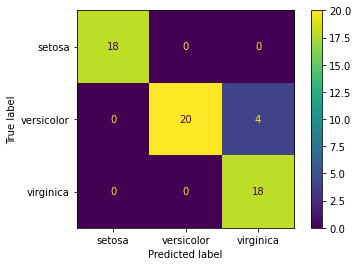

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, iris.target_names)
cmd.plot()

## 3.3 Evaluationsmaße des Klassifikators

Klassifikationsgenauigkeit (Accuracy)

In [22]:
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.83      0.91        24
           2       0.82      1.00      0.90        18

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.95      0.93      0.93        60



# 4. Einfluss von k auf die Klassifikationsgenauigkeit

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)
k_range = range(1,60)
accuracy_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"k={k} ergibt eine Klassifikationsgenauigkeit von {accuracy}")
    accuracy_list.append(accuracy)

k=1 ergibt eine Klassifikationsgenauigkeit von 0.9066666666666666
k=2 ergibt eine Klassifikationsgenauigkeit von 0.9333333333333333
k=3 ergibt eine Klassifikationsgenauigkeit von 0.92
k=4 ergibt eine Klassifikationsgenauigkeit von 0.9466666666666667
k=5 ergibt eine Klassifikationsgenauigkeit von 0.9333333333333333
k=6 ergibt eine Klassifikationsgenauigkeit von 0.9466666666666667
k=7 ergibt eine Klassifikationsgenauigkeit von 0.9333333333333333
k=8 ergibt eine Klassifikationsgenauigkeit von 0.9466666666666667
k=9 ergibt eine Klassifikationsgenauigkeit von 0.9333333333333333
k=10 ergibt eine Klassifikationsgenauigkeit von 0.9466666666666667
k=11 ergibt eine Klassifikationsgenauigkeit von 0.9466666666666667
k=12 ergibt eine Klassifikationsgenauigkeit von 0.9466666666666667
k=13 ergibt eine Klassifikationsgenauigkeit von 0.9466666666666667
k=14 ergibt eine Klassifikationsgenauigkeit von 0.9466666666666667
k=15 ergibt eine Klassifikationsgenauigkeit von 0.9466666666666667
k=16 ergibt eine K

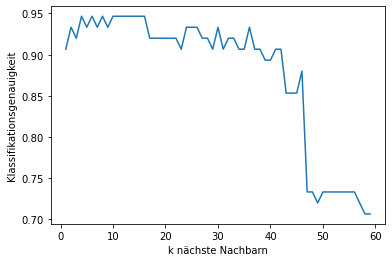

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, accuracy_list)
plt.xlabel("k nächste Nachbarn")
plt.ylabel("Klassifikationsgenauigkeit")
plt.show()